 # Exploratory Data Analysis of Olympics Data

## About the Project

Exploratory Data Analysis or EDA is an essential part of data analysis which helps you to understand data in a better way. The project focuses on data manipulation and visualization. 

We will perform EDA analysis on Olympics dataset using Python. We will analyze and visualize the past data. We will make use of Python libraries such as numpy, pandas, matplotlib and seaborn.

## About the Dataset

Olympics dataset is an historical data on modern olympics. It includes data from Athens 1896 to Rio 2016. It has details on summer and winter olympics. 

You can download the data from this link: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

You will get two files after downlaoding. The primary dataset is athlete_events.csv. The noc_regions.csv has the country names associated with NOC (National Olympics Committee)

The primary dataset has 15 attributes. They are:
1. ID - Unique number for each athlete
2. Name - Athlete's name
3. Sex - M or F
4. Age - Integer
5. Height - In centimeters
6. Weight - In kilograms
7. Team - Team name
8. NOC - National Olympic Committee 3-letter code
9. Games - Year and season
10. Year - Integer
11. Season - Summer or Winter
12. City - Host city
13. Sport - Sport
14. Event - Sporting Event
15. Medal - Gold, Silver, Bronze, or NA (No medals won)

We will analyze how Olympics has evolved over time by finding out participations of countries and athletes, participations of women and medals won by different countries


## Packages and Setup

In [1]:
import numpy as np                                  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [2]:
#Parameter Settings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading the data using Pandas library 

In [3]:
athletes = pd.read_csv("athlete_events.csv/athlete_events.csv")
regions = pd.read_csv("noc_regions.csv")

## Initial Processing

We will use pd.head() function to view the top 5 rows of the data. Similary we can use pd.tail() function to view the bottom 5 rows.

Note: pd refers to the dataframe 

In [4]:
athletes.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [5]:
athletes.tail()

ID                Name Sex   Age  Height  Weight      Team  NOC  \
271111  135569          Andrzej ya   M  29.0   179.0    89.0  Poland-1  POL   
271112  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271113  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271114  135571  Tomasz Ireneusz ya   M  30.0   185.0    96.0    Poland  POL   
271115  135571  Tomasz Ireneusz ya   M  34.0   185.0    96.0    Poland  POL   

              Games  Year  Season            City        Sport  \
271111  1976 Winter  1976  Winter       Innsbruck         Luge   
271112  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271113  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271114  1998 Winter  1998  Winter          Nagano    Bobsleigh   
271115  2002 Winter  2002  Winter  Salt Lake City    Bobsleigh   

                                           Event Medal  
271111                Luge Mixed (Men)'s Doubles   NaN  
271112  Ski Jumping Men's Large Hill, Individual   NaN  
271113        Ski Jumping Men's Large Hill, Team   NaN  
271114                      Bobsleigh Men's Four   NaN  
271115                      Bobsleigh Men's Four   NaN

In [6]:
#Let us check the top 5 rows in the region dataframe
regions.head()

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

Now let us print the shape of the dataframe using pd.shape. This will print the number of rows and columns of a dataframe

In [7]:
print(athletes.shape)
print(regions.shape)

(271116, 15)
(230, 3)


To check the column or attribute names of a dataframe we will use pd.columns. Let us display the column names in list form 

In [8]:
list(athletes.columns)
#athletes.columns.tolist()

['ID',
 'Name',
 'Sex',
 'Age',
 'Height',
 'Weight',
 'Team',
 'NOC',
 'Games',
 'Year',
 'Season',
 'City',
 'Sport',
 'Event',
 'Medal']

## Merging the dataframes

We will now merge the two dataframes athletes and regions. The function used for this is pd.merge(). We will use left join on the common column NOC. 

Refer the link https://pandas.pydata.org/docs/reference/api/pandas.merge.html for more details on pd.merge()

In [9]:
athletes_df = athletes.merge(regions, how= 'left', on= 'NOC')
athletes_df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal       region notes  
0       Basketball Men's Basketball   NaN        China   NaN  
1      Judo Men's Extra-Lightweight   NaN        China   NaN  
2           Football Men's Football   NaN      Denmark   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN  
4  Speed Skating Women's 500 metres   NaN  Netherlands   NaN

In [10]:
#Now let us see the shape of the data
athletes_df.shape 

(271116, 17)

The shape of the data has changed. The columns region and notes from the region dataset is added. The number of columns has increased from 15 to 17.

When you see the column names of the added columns it is not in consistent with the other columns. The first letter should be capital. So we will use pd.rename function to change the first letter to capital.

Refer the link https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html for more details on pd.rename()

In [11]:
athletes_df.rename(columns = {'region': 'Region', 'notes': 'Notes'}, inplace = True)

In [12]:
athletes_df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal       Region Notes  
0       Basketball Men's Basketball   NaN        China   NaN  
1      Judo Men's Extra-Lightweight   NaN        China   NaN  
2           Football Men's Football   NaN      Denmark   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN  
4  Speed Skating Women's 500 metres   NaN  Netherlands   NaN

The column names are changed and it matches the other columns

## Data Description

The next step is to understand information and various statistics of the data.

We will use pd.info() functions to print the information about a DataFrame including the index dtype and columns, non-null values and memory usage.

Refer the link https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html for more details on pd.info()

In [13]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


To get statistics like mean, SD, percentile, minimum and maximum we will use pd.describe() function. This is applicable for numeric data types. In case of object or strings the statistics displayed are count, unique value, top value(mode) and frequency of top value.

Refer the link https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html for more details on pd.describe()

When we use pd.describe without any arguments by default it will only display the result of numeric columns.

In [14]:
athletes_df.describe()

ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000

In case of object we have to pass an argument as shown below:

In [15]:
athletes_df.describe(include= [object])

Name     Sex           Team     NOC        Games  \
count                 271116  271116         271116  271116       271116   
unique                134732       2           1184     230           51   
top     Robert Tait McKenzie       M  United States     USA  2000 Summer   
freq                      58  196594          17847   18853        13821   

        Season    City      Sport                    Event  Medal  Region  \
count   271116  271116     271116                   271116  39783  270746   
unique       2      42         66                      765      3     205   
top     Summer  London  Athletics  Football Men's Football   Gold     USA   
freq    222552   22426      38624                     5733  13372   18853   

             Notes  
count         5039  
unique          21  
top     Yugoslavia  
freq          2583

If you want to check for both together then use the argument shown below:

In [16]:
athletes_df.describe(include= 'all')

ID                  Name     Sex            Age  \
count   271116.000000                271116  271116  261642.000000   
unique            NaN                134732       2            NaN   
top               NaN  Robert Tait McKenzie       M            NaN   
freq              NaN                    58  196594            NaN   
mean     68248.954396                   NaN     NaN      25.556898   
std      39022.286345                   NaN     NaN       6.393561   
min          1.000000                   NaN     NaN      10.000000   
25%      34643.000000                   NaN     NaN      21.000000   
50%      68205.000000                   NaN     NaN      24.000000   
75%     102097.250000                   NaN     NaN      28.000000   
max     135571.000000                   NaN     NaN      97.000000   

               Height         Weight           Team     NOC        Games  \
count   210945.000000  208241.000000         271116  271116       271116   
unique            NaN            NaN           1184     230           51   
top               NaN            NaN  United States     USA  2000 Summer   
freq              NaN            NaN          17847   18853        13821   
mean       175.338970      70.702393            NaN     NaN          NaN   
std         10.518462      14.348020            NaN     NaN          NaN   
min        127.000000      25.000000            NaN     NaN          NaN   
25%        168.000000      60.000000            NaN     NaN          NaN   
50%        175.000000      70.000000            NaN     NaN          NaN   
75%        183.000000      79.000000            NaN     NaN          NaN   
max        226.000000     214.000000            NaN     NaN          NaN   

                 Year  Season    City      Sport                    Event  \
count   271116.000000  271116  271116     271116                   271116   
unique            NaN       2      42         66                      765   
top               NaN  Summer  London  Athletics  Football Men's Football   
freq              NaN  222552   22426      38624                     5733   
mean      1978.378480     NaN     NaN        NaN                      NaN   
std         29.877632     NaN     NaN        NaN                      NaN   
min       1896.000000     NaN     NaN        NaN                      NaN   
25%       1960.000000     NaN     NaN        NaN                      NaN   
50%       1988.000000     NaN     NaN        NaN                      NaN   
75%       2002.000000     NaN     NaN        NaN                      NaN   
max       2016.000000     NaN     NaN        NaN                      NaN   

        Medal  Region       Notes  
count   39783  270746        5039  
unique      3     205          21  
top      Gold     USA  Yugoslavia  
freq    13372   18853        2583  
mean      NaN     NaN         NaN  
std       NaN     NaN         NaN  
min       NaN     NaN         NaN  
25%       NaN     NaN         NaN  
50%       NaN     NaN         NaN  
75%       NaN     NaN         NaN  
max       NaN     NaN         NaN

## Null Values

A null value indicates lack of values. It is important for us to check the null value in the data for proper analysis. We use pd.isnull() function to identify null values. 

Refer the link https://pandas.pydata.org/docs/reference/api/pandas.isnull.html for more details on pd.isnull()

In [17]:
null_columns = athletes_df.isnull().any()
null_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [18]:
#Sum of null values in the columns
athletes_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

### Q1. Print the column names having missing values in list form

In [26]:
athletes_df.columns[athletes_df.isna().any()].tolist()

['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes']

In [27]:
## Hint1: Use athlete_df.columns
## Hint2: Use list() or tolist()

# athletes_df.isnull().sum().tolist()
athletes_df.columns[athletes_df.isna().any()].tolist()

['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes']

## Analysis and Interpretation

Let us do some basic analysis of the data

We will get the details of athletes participating from India. For this we will use pd.query() function. We can use this function to query the columns using boolean conditions.

Refer the link https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html for more details on pd.query()

In [28]:
athletes_df.query('Team == "India"').head()

ID                             Name Sex   Age  Height  Weight   Team  \
505  281                   S. Abdul Hamid   M   NaN     NaN     NaN  India   
506  281                   S. Abdul Hamid   M   NaN     NaN     NaN  India   
895  512  Shiny Kurisingal Abraham-Wilson   F  19.0   167.0    53.0  India   
896  512  Shiny Kurisingal Abraham-Wilson   F  19.0   167.0    53.0  India   
897  512  Shiny Kurisingal Abraham-Wilson   F  23.0   167.0    53.0  India   

     NOC        Games  Year  Season         City      Sport  \
505  IND  1928 Summer  1928  Summer    Amsterdam  Athletics   
506  IND  1928 Summer  1928  Summer    Amsterdam  Athletics   
895  IND  1984 Summer  1984  Summer  Los Angeles  Athletics   
896  IND  1984 Summer  1984  Summer  Los Angeles  Athletics   
897  IND  1988 Summer  1988  Summer        Seoul  Athletics   

                                      Event Medal Region Notes  
505      Athletics Men's 110 metres Hurdles   NaN  India   NaN  
506      Athletics Men's 400 metres Hurdles   NaN  India   NaN  
895            Athletics Women's 800 metres   NaN  India   NaN  
896  Athletics Women's 4 x 400 metres Relay   NaN  India   NaN  
897            Athletics Women's 800 metres   NaN  India   NaN

### Q2. Print the top ten rows of details of athletes from China

In [30]:
#Hint: Refer the previous code

athletes_df.query('Team =="China"').head(10)

ID           Name Sex   Age  Height  Weight   Team  NOC        Games  \
0        1      A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer   
1        2       A Lamusi   M  23.0   170.0    60.0  China  CHN  2012 Summer   
1072   602  Abudoureheman   M  22.0   182.0    75.0  China  CHN  2000 Summer   
2611  1463      Ai Linuer   M  25.0   160.0    62.0  China  CHN  2004 Summer   
2612  1464      Ai Yanhan   F  14.0   168.0    54.0  China  CHN  2016 Summer   
2613  1464      Ai Yanhan   F  14.0   168.0    54.0  China  CHN  2016 Summer   
6427  3605    An Weijiang   M  22.0   178.0    72.0  China  CHN  2006 Winter   
6428  3605    An Weijiang   M  22.0   178.0    72.0  China  CHN  2006 Winter   
6433  3610      An Yulong   M  19.0   173.0    70.0  China  CHN  1998 Winter   
6434  3610      An Yulong   M  19.0   173.0    70.0  China  CHN  1998 Winter   

      Year  Season            City                      Sport  \
0     1992  Summer       Barcelona                 Basketball   
1     2012  Summer          London                       Judo   
1072  2000  Summer          Sydney                     Boxing   
2611  2004  Summer          Athina                  Wrestling   
2612  2016  Summer  Rio de Janeiro                   Swimming   
2613  2016  Summer  Rio de Janeiro                   Swimming   
6427  2006  Winter          Torino              Speed Skating   
6428  2006  Winter          Torino              Speed Skating   
6433  1998  Winter          Nagano  Short Track Speed Skating   
6434  1998  Winter          Nagano  Short Track Speed Skating   

                                                Event   Medal Region Notes  
0                         Basketball Men's Basketball     NaN  China   NaN  
1                        Judo Men's Extra-Lightweight     NaN  China   NaN  
1072                        Boxing Men's Middleweight     NaN  China   NaN  
2611         Wrestling Men's Lightweight, Greco-Roman     NaN  China   NaN  
2612            Swimming Women's 200 metres Freestyle     NaN  China   NaN  
2613  Swimming Women's 4 x 200 metres Freestyle Relay     NaN  China   NaN  
6427                   Speed Skating Men's 500 metres     NaN  China   NaN  
6428                 Speed Skating Men's 1,000 metres     NaN  China   NaN  
6433       Short Track Speed Skating Men's 500 metres  Silver  China   NaN  
6434     Short Track Speed Skating Men's 1,000 metres     NaN  China   NaN

#### Top ten countries in terms of participation

We will identify the top ten countries who have participated the Olympics since 1896. 

For this we will use pd.value_counts() and pd.sort_values(). The function pd.value_counts() return the counts of unique values and pd.sort_values will sort the values in ascending or descending order. We will use these two functions on the Team column and print the top ten values using pd.head() function.

Refer the links below for more information:

pd.value_counts() = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html

pd.sort_values() = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

In [31]:
Top_countries = athletes_df["Team"].value_counts().sort_values(ascending = False).head(10)
Top_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

We can plot a bar graph for the same using Matplotlib and Seaborn libraries.

For more details on creating bar plot with sns and plt refer the link https://www.geeksforgeeks.org/seaborn-barplot-method-in-python/

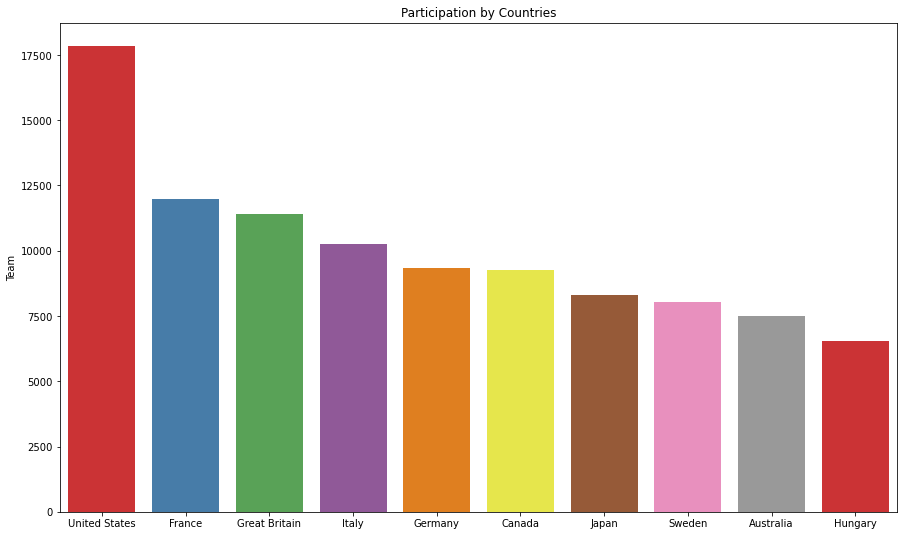

In [32]:
plt.figure(figsize=(15,9))                   #Setting the size of the graph in terms of width & height
plt.title("Participation by Countries")      #To display title of the graph
sns.barplot(x = Top_countries.index, y= Top_countries, palette = 'Set1' )
plt.show()                                    #This used to display the plot

Plot the graph without plt.show() and write your observation below

<AxesSubplot:title={'center':'Participation by Countries'}, ylabel='Team'>

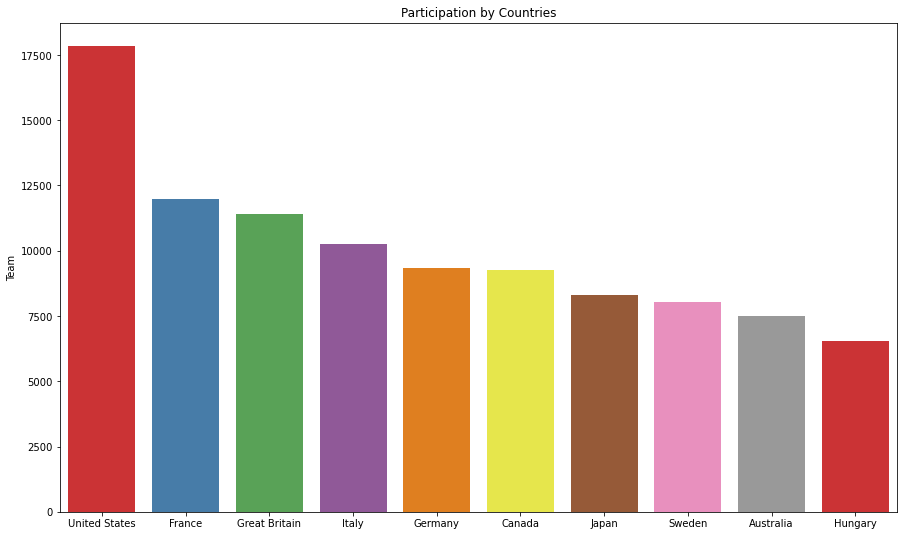

In [33]:
plt.figure(figsize=(15,9))                   #Setting the size of the graph in terms of width & height
plt.title("Participation by Countries")      #To display title of the graph
sns.barplot(x = Top_countries.index, y= Top_countries, palette = 'Set1' )

Analysis: 

#### Age distribution

We will plot the distribution of age using histogram. For this plt.hist() function is used. 
np.arange() returns evenly placed within given interval.

Refer the link below for more information:

np.arange: https://numpy.org/doc/stable/reference/generated/numpy.arange.html

plt.hist(): https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html


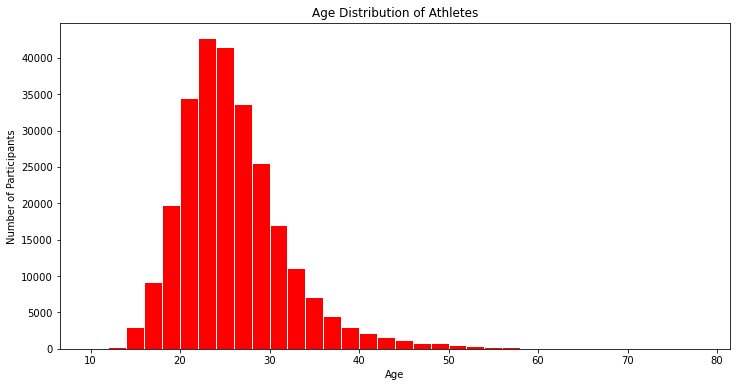

In [34]:
plt.figure(figsize= (12,6))
plt.title("Age Distribution of Athletes")
plt.xlabel("Age")                         
plt.ylabel("Number of Participants")
plt.hist(athletes_df.Age, bins = np.arange(10,80,2), color = 'red', edgecolor = 'white')
plt.show()

#### Types of Sports played during winter and summer olympics

There are differnt types of sporting events taking place at summer and winter olympics. For this we will use a boolean condition and pd.unique() function.

pd.unique function returns the unique values in order of appearance.

Refer the link https://pandas.pydata.org/docs/reference/api/pandas.unique.html for more information on pd.unique()

In [35]:
winter_sports = athletes_df[athletes_df.Season == 'Winter'].Sport.unique()
print(winter_sports)

['Speed Skating' 'Cross Country Skiing' 'Ice Hockey' 'Biathlon'
 'Alpine Skiing' 'Luge' 'Bobsleigh' 'Figure Skating' 'Nordic Combined'
 'Freestyle Skiing' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Short Track Speed Skating' 'Skeleton' 'Military Ski Patrol' 'Alpinism']


### Q3. Print the types of sports played at summer olympics


In [41]:
summer_sports = athletes_df[athletes_df.Season=='Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

### Q4. Print the number of games played in winter and summer olympics

In [42]:
#Hint: Use len() function
print("The numner of winter sports in olympics are", len(winter_sports))
print("The numner of summer sports in olympics are", len(summer_sports))

The numner of winter sports in olympics are 17
The numner of summer sports in olympics are 52


#### Top 5 sports with maximum number of participants

In [43]:
max_participants = list(athletes_df.Sport.value_counts().sort_values(ascending= False).head().index)
print("The top 5 sports with maximum number of participants are:",*max_participants, sep = '\n')

The top 5 sports with maximum number of participants are:
Athletics
Gymnastics
Swimming
Shooting
Cycling


### Q5. Print the top 5 sports with minimum number of participants

In [45]:
min_participants = list(athletes_df.Sport.value_counts().sort_values(ascending= True).head().index)
print("The top 5 sports with minimum number of participants are:", *min_participants, sep='\n')

The top 5 sports with minimum number of participants are:
Aeronautics
Basque Pelota
Roque
Jeu De Paume
Racquets


## Women in Olympics

#### Total number of female and male participants in Olympics since the beginning

In [46]:
gender_counts = athletes_df.Sex.value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

#### Pie plot for gender distribution

We will use a pie plot to show the gender distribution in Olympic games. For this plt.pie() function from matplotlib library is used.

Refer the link https://pandas.pydata.org/docs/reference/api/pandas.unique.html for more information on plt.pie()

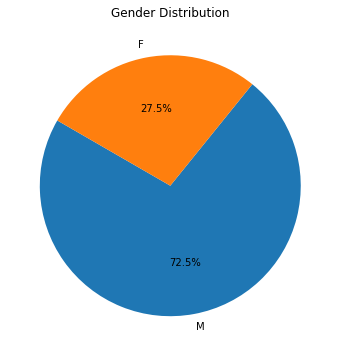

In [47]:
plt.figure(figsize=(12,6))
plt.title("Gender Distribution")
plt.pie(gender_counts, labels = gender_counts.index, autopct= '%1.1f%%', startangle = 150)
plt.show()

autopct is used for string formating 

Try changing the startangle to 180 and see the differnce.

What is the percentage of women in Olympics? Type your answer below

In [54]:
gender_counts = (athletes_df.Sex.value_counts(normalize= True)*100)
print("The percentage of women in ",gender_counts['F'].round())

The percentage of women in  27.0


#### Total number of female athletes in each Olympics

Summer Olympics

In [67]:
female_summer = athletes_df[(athletes_df.Sex == 'F') & (athletes_df.Season == 'Summer')][['Sex', 'Year']]
female_summer = female_summer.groupby('Year').count().reset_index()

pd.reset_index() function is used to reset the index of the DataFrame.

Refer the link https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html for more information on pd.reset_index()

In [68]:
female_summer
female_summer.head(10)

Year  Sex
0  1900   33
1  1904   16
2  1906   11
3  1908   47
4  1912   87
5  1920  134
6  1924  244
7  1928  404
8  1932  347
9  1936  468

In [69]:
female_summer.tail(10)

Year   Sex
18  1980  1756
19  1984  2447
20  1988  3543
21  1992  4124
22  1996  5008
23  2000  5431
24  2004  5546
25  2008  5816
26  2012  5815
27  2016  6223

### Q6. Print the total number of females participated in the winter olympics

In [71]:
#Hint: Refer the above code
female_winter= athletes_df[(athletes_df.Sex == 'F') & (athletes_df.Season == 'Winter')][['Sex', 'Year']]
female_winter = female_summer.groupby('Year').count().reset_index()
female_winter.head()

Year  Sex
0  1900    1
1  1904    1
2  1906    1
3  1908    1
4  1912    1

#### Count plot for female athletes

We will create a count plot for the number of female particpants at Summer Olympics. 

First we will get the details of female participants at Summer Olympics

In [75]:
female_olympics_Summer = athletes_df[(athletes_df.Sex == 'F') & (athletes_df.Season == 'Summer')]

For count plot we will use Seaborn library.

Refer the link https://towardsdatascience.com/matplotlib-seaborn-basics-2bd7b66dbee2 to undesrtand more about plotting using Seaborn library

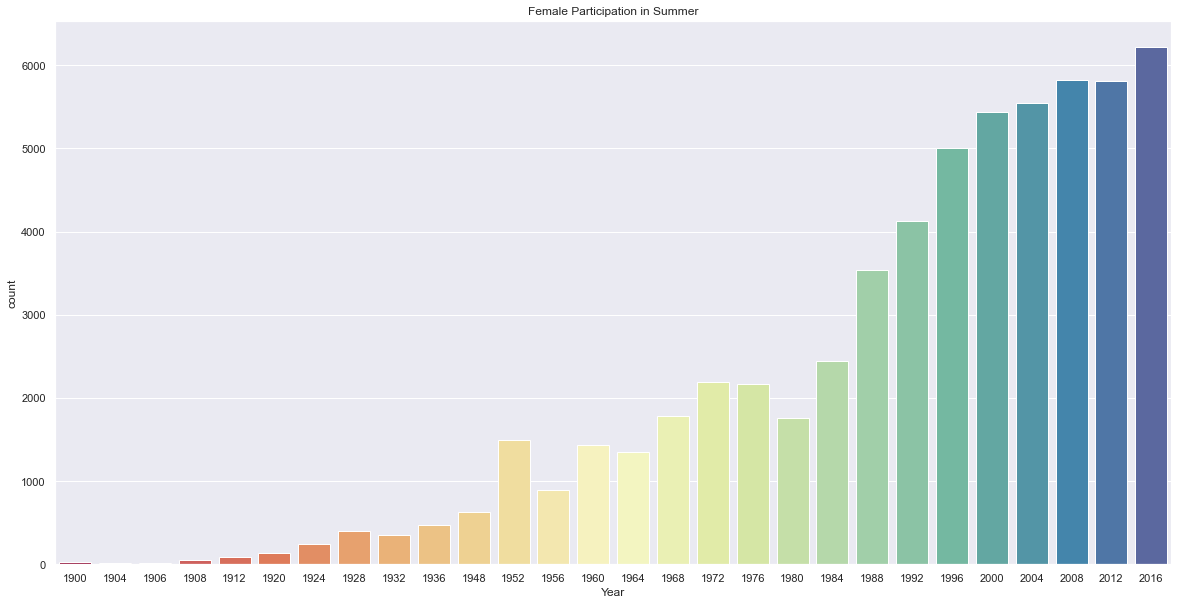

In [76]:
sns.set(style = "darkgrid")           #Setting the theme
plt.figure(figsize = (20,10))
sns.countplot(x = 'Year', data = female_olympics_Summer, palette = 'Spectral')    #palette is a color palette that we wish to use
plt.title(('Female Participation in Summer'))
plt.show()

Let us create a line or a trend plot for the same

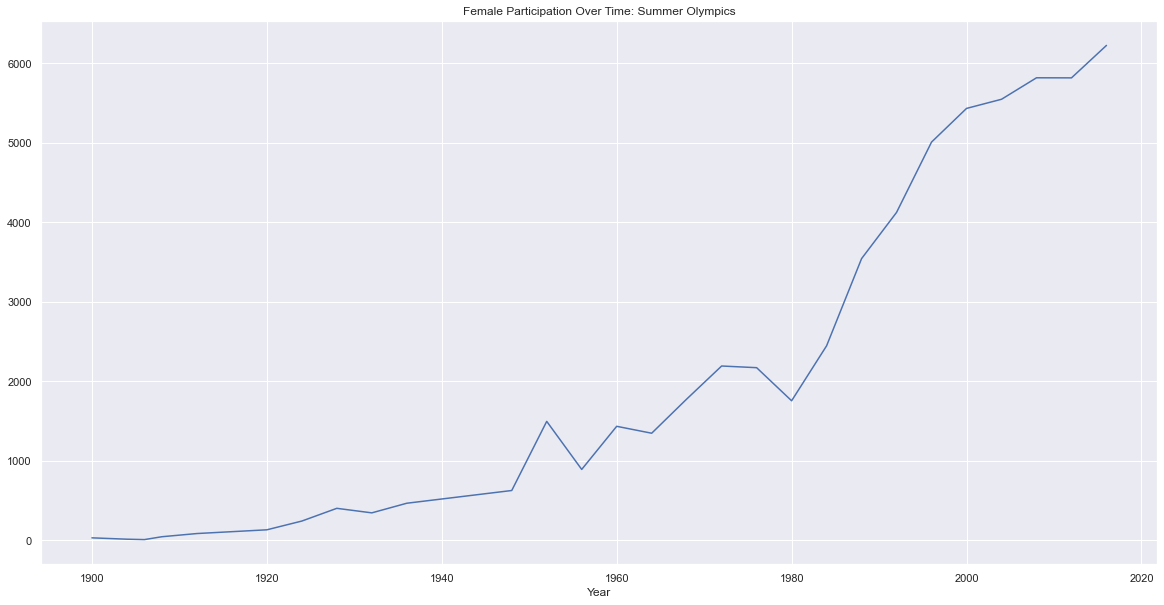

In [77]:
group_female = female_olympics_Summer.groupby('Year')['Sex'].value_counts()
plt.figure(figsize= (20,10))
group_female.loc[:, 'F'].plot()
plt.title("Female Participation Over Time: Summer Olympics")
plt.show()

pd.groupby() function involves some combination of splitting the object, applying a function, and combining the results.

Refer the link https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html for more information on pd.groupby()

### Q7. Create a trend plot for female participation at winter olympics and write your analysis

In [78]:
female_olympics_Winter = athletes_df[(athletes_df.Sex == 'F') & (athletes_df.Season == 'Winter')]

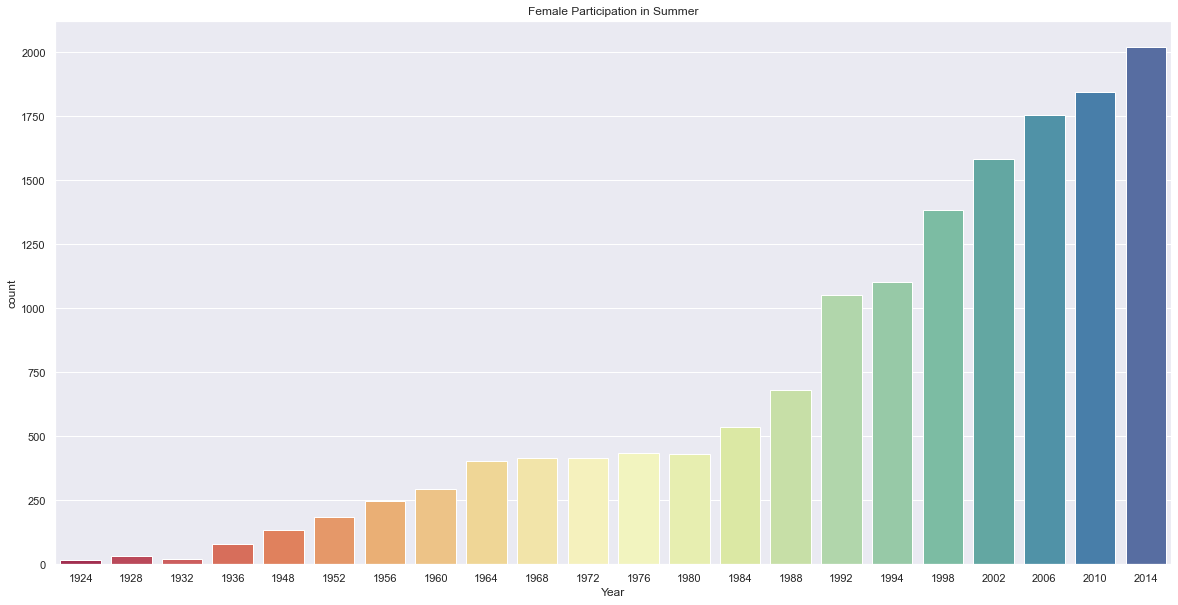

In [79]:
sns.set(style = "darkgrid")           #Setting the theme
plt.figure(figsize = (20,10))
sns.countplot(x = 'Year', data = female_olympics_Winter, palette = 'Spectral')    #palette is a color palette that we wish to use
plt.title(('Female Participation in Summer'))
plt.show()

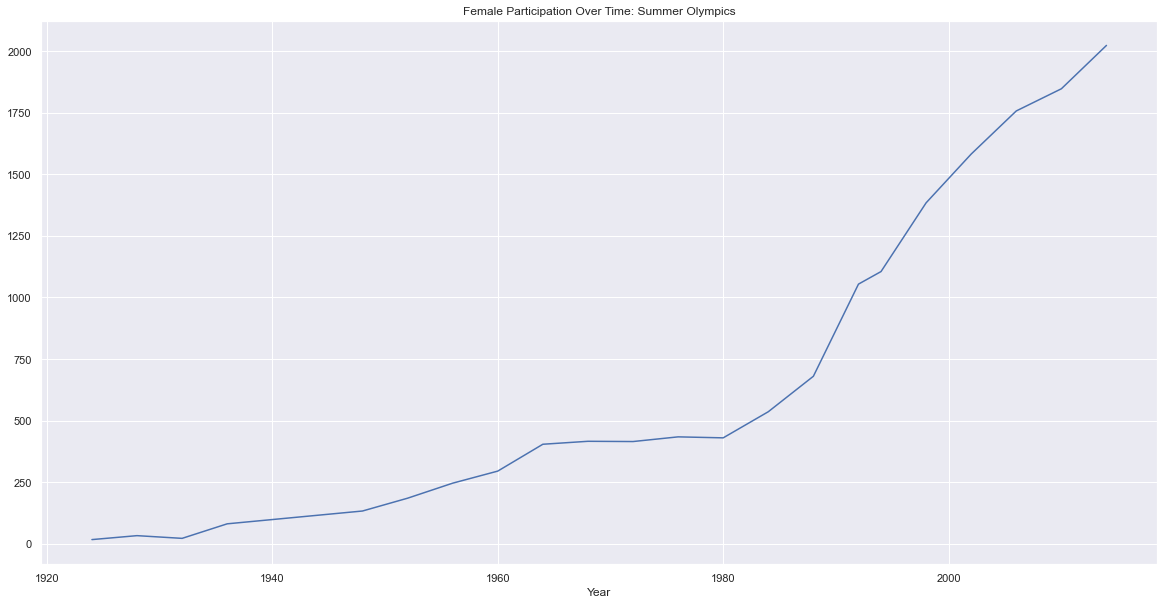

In [80]:
group_female = female_olympics_Winter.groupby('Year')['Sex'].value_counts()
plt.figure(figsize= (20,10))
group_female.loc[:, 'F'].plot()
plt.title("Female Participation Over Time: Summer Olympics")
plt.show()

#### Analysis

- We can clearly find that there is increse in the participation of women in both Winter & summner olmpics
- The participation of women has incresed after **1980**

## Analysis on Medals

#### Total number of medals won by athletes

In [81]:
athletes_df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

#### Top 10 athletes who won gold medals

In [82]:
gold_medals = athletes_df[(athletes_df.Medal == 'Gold')]
gold_medals.head(10)

ID                       Name Sex   Age  Height  Weight            Team  \
3     4       Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
42   17    Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   
44   17    Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   
48   17    Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   
60   20         Kjetil Andr Aamodt   M  20.0   176.0    85.0          Norway   
73   20         Kjetil Andr Aamodt   M  30.0   176.0    85.0          Norway   
76   20         Kjetil Andr Aamodt   M  30.0   176.0    85.0          Norway   
78   20         Kjetil Andr Aamodt   M  34.0   176.0    85.0          Norway   
79   21  Ragnhild Margrethe Aamodt   F  27.0   163.0     NaN          Norway   
113  40            Roald Edgar Aas   M  31.0     NaN     NaN          Norway   

     NOC        Games  Year  Season            City          Sport  \
3    DEN  1900 Summer  1900  Summer           Paris     Tug-Of-War   
42   FIN  1948 Summer  1948  Summer          London     Gymnastics   
44   FIN  1948 Summer  1948  Summer          London     Gymnastics   
48   FIN  1948 Summer  1948  Summer          London     Gymnastics   
60   NOR  1992 Winter  1992  Winter     Albertville  Alpine Skiing   
73   NOR  2002 Winter  2002  Winter  Salt Lake City  Alpine Skiing   
76   NOR  2002 Winter  2002  Winter  Salt Lake City  Alpine Skiing   
78   NOR  2006 Winter  2006  Winter          Torino  Alpine Skiing   
79   NOR  2008 Summer  2008  Summer         Beijing       Handball   
113  NOR  1960 Winter  1960  Winter    Squaw Valley  Speed Skating   

                                Event Medal   Region Notes  
3         Tug-Of-War Men's Tug-Of-War  Gold  Denmark   NaN  
42   Gymnastics Men's Team All-Around  Gold  Finland   NaN  
44       Gymnastics Men's Horse Vault  Gold  Finland   NaN  
48   Gymnastics Men's Pommelled Horse  Gold  Finland   NaN  
60        Alpine Skiing Men's Super G  Gold   Norway   NaN  
73        Alpine Skiing Men's Super G  Gold   Norway   NaN  
76       Alpine Skiing Men's Combined  Gold   Norway   NaN  
78        Alpine Skiing Men's Super G  Gold   Norway   NaN  
79          Handball Women's Handball  Gold   Norway   NaN  
113  Speed Skating Men's 1,500 metres  Gold   Norway   NaN

#### Athletes who won the gold medals and are aged 60 & above

We will filter out the NaN rows corresponding to the Age column. For this np.isfinite() function is used. This will test element-wise for finiteness (not infinity or not Not a Number).

Refer the link https://numpy.org/doc/stable/reference/generated/numpy.isfinite.html for more information on np.isfinite()

In [83]:
gold_medals = gold_medals[np.isfinite(gold_medals['Age'])]

Atheletes who are equal or above 60 and won gold medals

In [84]:
gold_medals.Name[gold_medals.Age >= 60].count()
#or 
#gold_medals['Name'][gold_medals['Age'] >=60].count()

10

For which sporting event the above gold medals where recieved

In [85]:
sport_event = gold_medals.Sport[gold_medals.Age >=60]
sport_event

104003    Art Competitions
105199               Roque
159298            Shooting
190952             Archery
226374             Archery
233386            Shooting
233387            Shooting
233390            Shooting
261102             Archery
261675    Art Competitions
Name: Sport, dtype: object

#### Visualize the height of athletes (Male & Female) who won gold, silver and bronze medals


We will first filter out the data for athletes who have won medals. There are lot of Null values in the medal columns. We are not considering those values. Even the null values of height and weight columns should be filtered out

In [86]:
not_null_data = athletes_df[(athletes_df.Medal.notnull() & athletes_df.Height.notnull() & athletes_df.Weight.notnull())]
not_null_data.isnull().sum()

ID            0
Name          0
Sex           0
Age          15
Height        0
Weight        0
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
Region        9
Notes     29766
dtype: int64

We will plot the height versus weight graph of olympic medalist both male and female using a scatter plot. For this purpose we will use sns.scatterplot() from Seaborn library. 

The argument hue is nothing but a grouping variable.

Refer the link https://www.geeksforgeeks.org/scatterplot-using-seaborn-in-python/ for more information on sns.scatterplot()

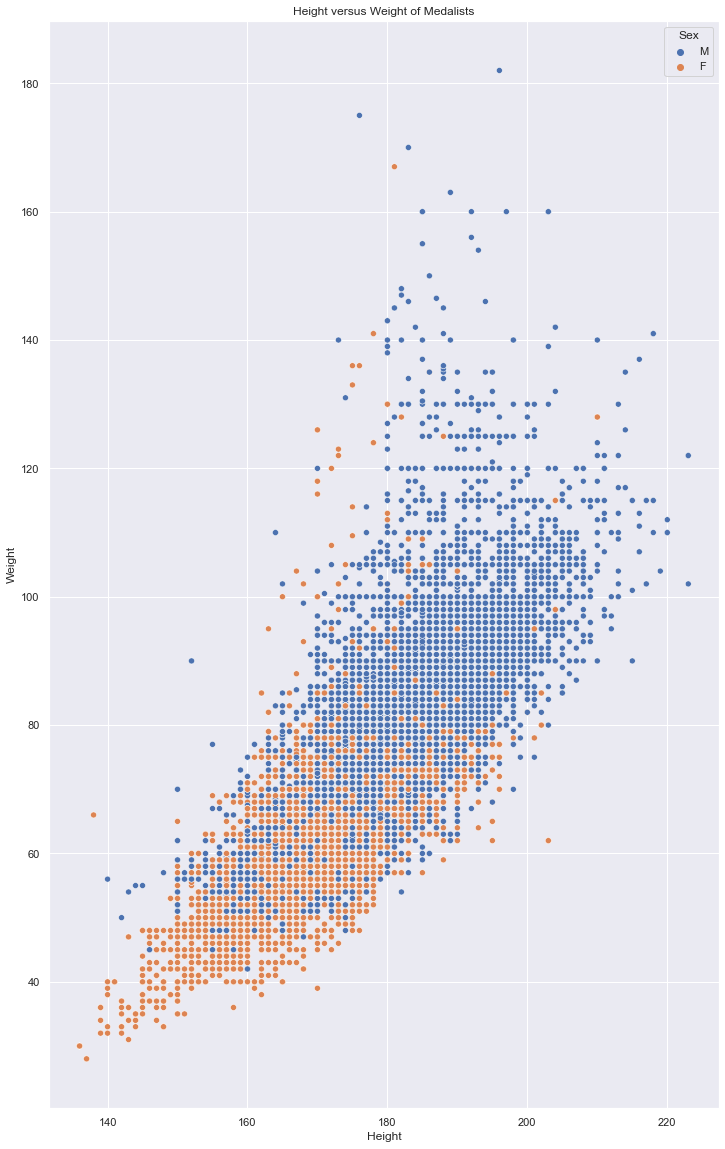

In [87]:
plt.figure(figsize = (12,20))
axis = sns.scatterplot(x = 'Height', y= 'Weight', data = not_null_data, hue = 'Sex')
plt.title("Height versus Weight of Medalists")
plt.show()

#### Country wise gold medal winners

In [88]:
gold_medals.Region.value_counts().reset_index(name= 'Medal').head(10)

index  Medal
0      USA   2627
1   Russia   1599
2  Germany   1293
3       UK    657
4    Italy    567
5   France    491
6   Sweden    479
7   Canada    461
8  Hungary    432
9   Norway    378

We will create a catplot or a category plot to display countrywise gold medal winners. For this we will use sns.catplot() from Seaborn library.

Refer the link https://www.geeksforgeeks.org/python-seaborn-catplot/ for more information on sns.catplot()

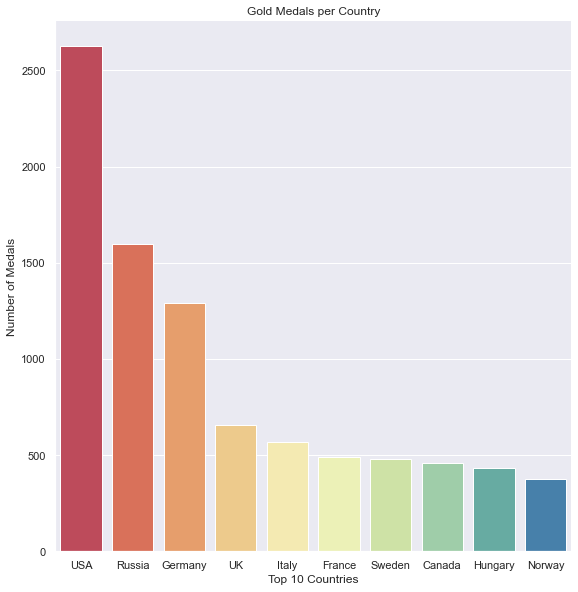

In [89]:
total_gold_medals = gold_medals.Region.value_counts().reset_index(name = 'Medal').head(10)
g= sns.catplot(x= 'index', y = 'Medal', data = total_gold_medals,height= 8,  kind = 'bar', palette= 'Spectral')
g.set_xlabels("Top 10 Countries")
g.set_ylabels("Number of Medals")
plt.title("Gold Medals per Country")
plt.show()

## Weightlifting sport analysis

We will observe weight of weightlifting men over the years using point plot. We will filter out data of weightlifiting men from the athletes_df for the Summer Olympics

In [90]:
men_olympics = athletes_df[(athletes_df.Sex == 'M') & (athletes_df.Season == 'Summer')]
wl_men = men_olympics.loc[men_olympics['Sport'] == 'Weightlifting']

A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points. We will use sns.pointplot() function from Seaborn library.

Refer the below links for more information on sns.pointplot()

https://www.geeksforgeeks.org/python-seaborn-pointplot-method/

https://seaborn.pydata.org/generated/seaborn.pointplot.html

https://www.youtube.com/watch?v=gsQRlrcNCvI

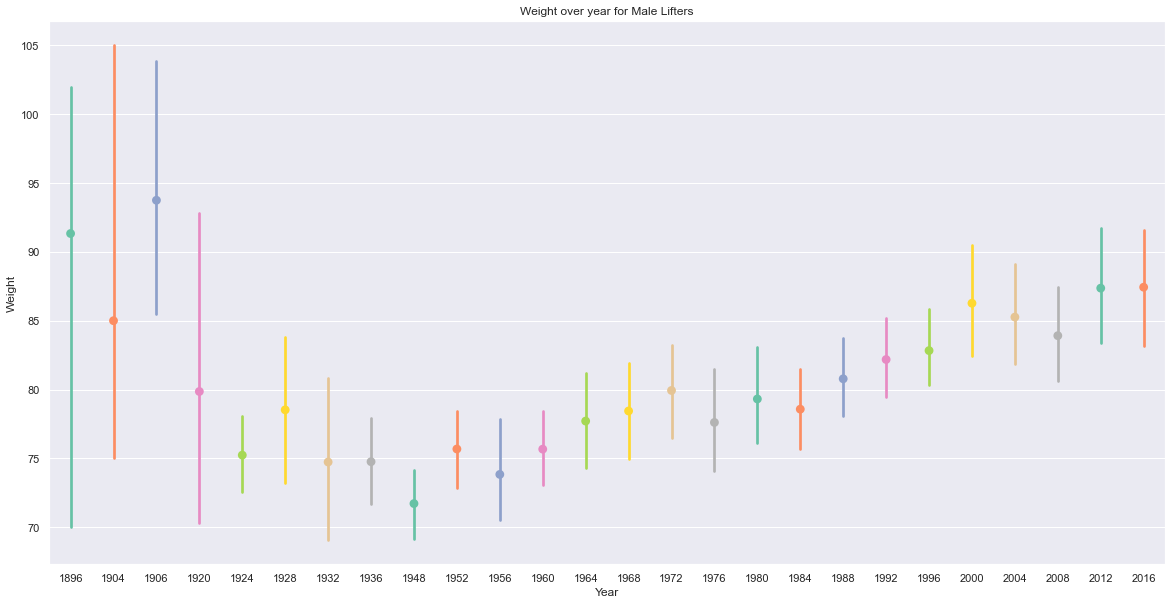

In [91]:
plt.figure(figsize=(20, 10))
sns.pointplot(x = 'Year', y= 'Weight', data=wl_men, palette='Set2')
plt.title('Weight over year for Male Lifters')
plt.show()

### Q8. Create a point plot for weight of men over the years 

## Rio Olympics analysis

We will analyze the most recent olympics data that is available in the dataset i.e. Rio Olympics

#### Country wise medals at Rio Olympics

In [92]:
rio_year = athletes_df.Year.max()
print("The Rio Olympics has been hosted in the year",rio_year)
Country_Names = athletes_df[(athletes_df.Year == rio_year) & (athletes_df.Medal == 'Gold')].Team
Country_Names.value_counts().head(10)

The Rio Olympics has been hosted in the year 2016


United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

We will create a bar plot for the top ten countries in Rio Olympics

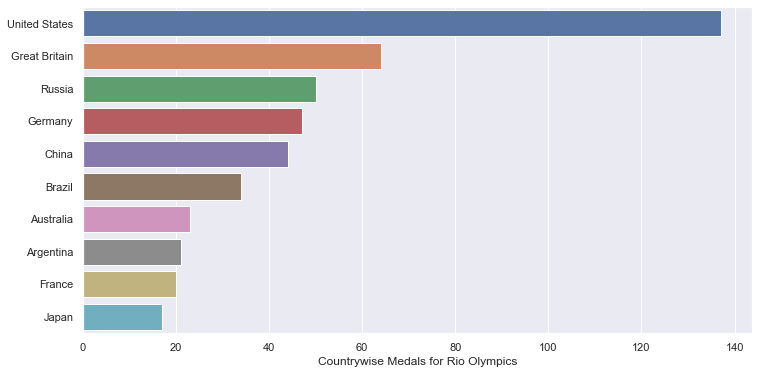

In [93]:
plt.figure(figsize= (12,6))
sns.barplot(x = Country_Names.value_counts().head(10), y=Country_Names.value_counts().head(10).index)
plt.ylabel(None)
plt.xlabel('Countrywise Medals for Rio Olympics')
plt.show()